In [1]:
import yfinance as yf
ticker_list_SwissCap = ['UFPT', 'MGPI', 'SWBI']
ticker_list_Sipartech = ['SHEN', 'CMBM', 'LSCC', 'USM', 'CNSL', 'WOW', 'ATEX', 'DY', 'BEEM', 'LASR', 'CCOI', 'RBBN', 'TCX']
ticker_list_ShuanghuiWHGroup = ['HFFG', 'WSFS']
ticker_list_Unopi = ['AOUT', 'CENT', 'DOOR', 'ESCA', 'VSTO', 'MLI', 'FLXS', 'JOUT']
ticker_list_TotalExpress = ['ECOM', 'SPSC', 'EVOP', 'PBI', 'HUBG', 'ACIW', 'LRN', 'QNST', 'RBBN', 'ADTN', 'ADV', 'PAE', 'ULH', 'ATSG', 'PTSI', 'FN', 'MAX', 'CTLP', 'DLX']
ticker_list_total=[]
ticker_list_total.append(ticker_list_SwissCap)
ticker_list_total.append(ticker_list_Sipartech)
ticker_list_total.append(ticker_list_ShuanghuiWHGroup)
ticker_list_total.append(ticker_list_Unopi)
ticker_list_total.append(ticker_list_TotalExpress)

adj_close_list = []
for elem in ticker_list_total:
    ticker_list = elem
    data = yf.download(ticker_list, start= '2019-1-1', end= '2023-1-1')
    adj_close= data['Adj Close']
    adj_close_list.append(adj_close)
    



[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  13 of 13 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  19 of 19 completed

2 Failed downloads:
- ECOM: No timezone found, symbol may be delisted
- PAE: No timezone found, symbol may be delisted


In [37]:
index_name_list = ["swiss_cap", "sipar_tech", "shuanhui_wh_group", "unopi"]

In [2]:
len(adj_close_list)

5

In [21]:
adj_close_list[0]

,MGPI,SWBI,UFPT
Date,,,
2019-01-02 00:00:00-05:00,54.570320,9.514873,31.400000
2019-01-03 00:00:00-05:00,54.386417,9.478417,29.799999
2019-01-04 00:00:00-05:00,56.293182,9.456543,31.520000
2019-01-07 00:00:00-05:00,56.593231,9.602365,30.730000
2019-01-08 00:00:00-05:00,58.529041,9.821097,31.260000
...,...,...,...
2022-12-23 00:00:00-05:00,109.440002,8.720000,115.540001
2022-12-27 00:00:00-05:00,108.680000,8.640000,114.489998
2022-12-28 00:00:00-05:00,106.480003,8.510000,112.209999


In [4]:
price_return = adj_close.iloc[-1].div(adj_close.iloc[0]).sub(1).mul(100)

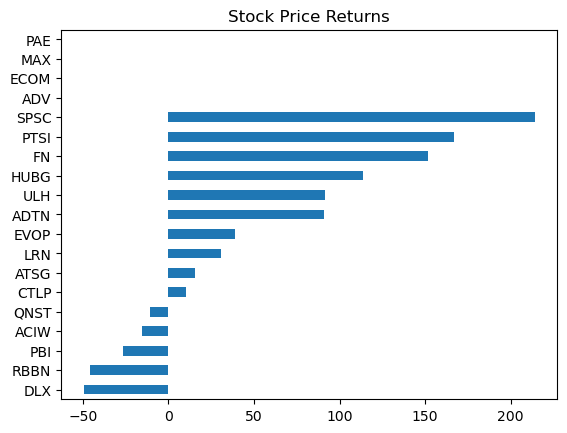

In [5]:
price_return.sort_values().plot(kind='barh', title='Stock Price Returns');

In [6]:
import numpy as np
import pandas as pd
import numpy_financial as npf
import matplotlib.pyplot as plt

In [8]:
ticker_data = []
for elem in ticker_list_total[0:4]:
    tickers_list = [yf.Ticker(ticker) for ticker in elem ]
    shares_list = [] 
    marketCap_list = []
    symbols_list = []
    shareprice_list=[]# list for each ticker's dataframe
    for ticker in tickers_list:
    #get each financial statement
        symbols_list.append(ticker)
        shareprice_list.append(ticker.fast_info['last_price'])
        shares_list.append(ticker.fast_info['shares'])
        marketCap_list.append(ticker.fast_info['market_cap'])
    # concatenate into one dataframe

    zipped = list(zip(symbols_list, shareprice_list, shares_list, marketCap_list))

    ticker_data.append(pd.DataFrame(zipped, columns=['Symbol', 'Share Price', 'SharesOutstanding', 'Market Cap']))
print(ticker_data)

[                          Symbol  Share Price  SharesOutstanding    Market Cap
0  yfinance.Ticker object <UFPT>   111.540001            7578600  8.453171e+08
1  yfinance.Ticker object <MGPI>    96.000000           21994000  2.111424e+09
2  yfinance.Ticker object <SWBI>    10.990000           45897300  5.044113e+08,                            Symbol  Share Price  SharesOutstanding  \
0   yfinance.Ticker object <SHEN>    19.040001           50098300   
1   yfinance.Ticker object <CMBM>    21.580000           27035400   
2   yfinance.Ticker object <LSCC>    89.269997          137059008   
3    yfinance.Ticker object <USM>    21.760000           85215600   
4   yfinance.Ticker object <CNSL>     4.300000          115396000   
5    yfinance.Ticker object <WOW>    11.670000           87660200   
6   yfinance.Ticker object <ATEX>    34.110001           18868900   
7     yfinance.Ticker object <DY>    83.089996           29556700   
8   yfinance.Ticker object <BEEM>    16.760000           1009

In [12]:
len(adj_close)

1008

In [13]:
type(adj_close)

pandas.core.frame.DataFrame

In [14]:
len(shares_list)

8

(1, 3)
(1008, 3)
(1008, 3)


/var/folders/j4/2v0hxs8n2ddgxyskrh60j0p00000gn/T/ipykernel_2170/1474881479.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  shares_list = shares_list[np.newaxis, ...]


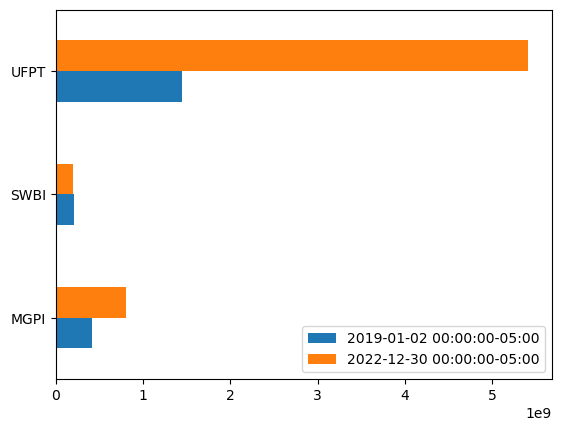

(1, 13)
(1008, 13)
(1008, 13)


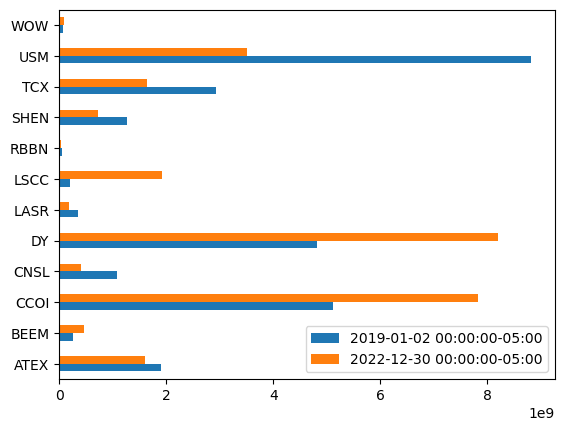

(1, 2)
(1008, 2)
(1008, 2)


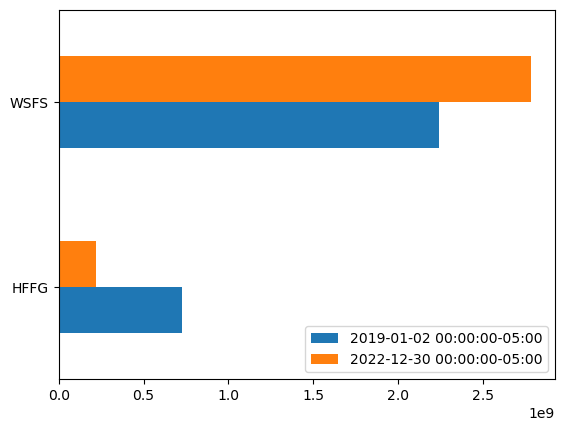

(1, 8)
(1008, 8)
(1008, 8)


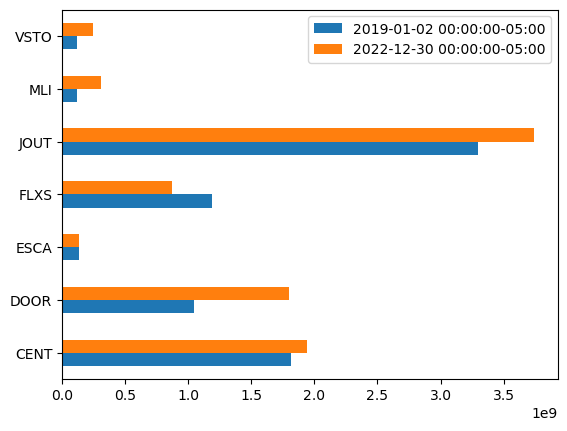

[                                   MGPI          SWBI          UFPT
Date                                                               
2019-01-02 00:00:00-05:00  4.135666e+08  2.092701e+08  1.441175e+09
2019-01-03 00:00:00-05:00  4.121729e+08  2.084683e+08  1.367740e+09
2019-01-04 00:00:00-05:00  4.266235e+08  2.079872e+08  1.446683e+09
2019-01-07 00:00:00-05:00  4.288975e+08  2.111944e+08  1.410424e+09
2019-01-08 00:00:00-05:00  4.435682e+08  2.160052e+08  1.434750e+09
...                                 ...           ...           ...
2022-12-23 00:00:00-05:00  8.294020e+08  1.917877e+08  5.302974e+09
2022-12-27 00:00:00-05:00  8.236423e+08  1.900282e+08  5.254782e+09
2022-12-28 00:00:00-05:00  8.069694e+08  1.871689e+08  5.150136e+09
2022-12-29 00:00:00-05:00  8.209139e+08  1.931073e+08  5.330053e+09
2022-12-30 00:00:00-05:00  8.062114e+08  1.909079e+08  5.410833e+09

[1008 rows x 3 columns],                                    ATEX          BEEM          CCOI  \
Date              

In [28]:
market_cap_list = []
index_names_list 


for single_ticker_data, adj_close in zip(ticker_data, adj_close_list):
    # Create the series of market cap per ticker
    #market_cap_list = []
    #for elem in adj_close_list:
    index_names_list.append(single_ticker_data[])
    shares_list = single_ticker_data["SharesOutstanding"]
    shares_list = shares_list[np.newaxis, ...]
    print(shares_list.shape)
    print(adj_close.shape)
    market_cap = adj_close.mul(shares_list)
    print(market_cap.shape)
    market_cap_list.append(market_cap)

    # Select first and last market cap here
    first_value = market_cap.iloc[0]
    last_value = market_cap.iloc[-1]
    
    #print(f"{first_value} {last_value}")

    # Concatenate and plot first and last market cap here
    pd.concat([first_value, last_value], axis=1).dropna().plot(kind='barh');
    plt.show()
#print(market_cap_list)


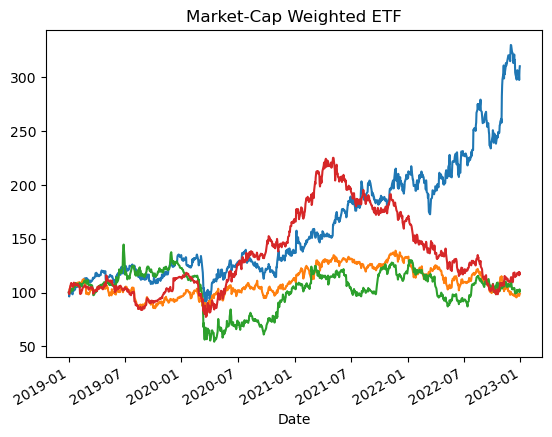

In [44]:
market_cap_series_list = []
index_list = []
for market_cap in market_cap_list:
    first_value = market_cap.iloc[0]
    last_value = market_cap.iloc[-1]
    market_cap_series = market_cap[pd.concat([first_value, last_value], axis=1).dropna().index.tolist()]
    market_cap_series_list.append(market_cap_series)

    raw_index = market_cap_series.sum(axis=1)
    #print(raw_index)

    # Normalize the aggregate market cap here
    index = raw_index.div(raw_index.iloc[0]).mul(100)
    index_list.append(index)
    #print(index)

    # Plot the index here
    index.plot(title='Market-Cap Weighted ETF');

In [30]:
from datetime import datetime

def PME(investment_value, private_equity_returns, public_market_index, investment_date, exit_date, contributions=None, distributions=None, contribution_dates=None, distribution_dates=None):
    # Convert strings to datetime objects
    investment_date = datetime.strptime(investment_date, '%Y-%m-%d')
    exit_date = datetime.strptime(exit_date, '%Y-%m-%d')
    contribution_dates = [datetime.strptime(d, '%Y-%m-%d') for d in contribution_dates] if contribution_dates else []
    distribution_dates = [datetime.strptime(d, '%Y-%m-%d') for d in distribution_dates] if distribution_dates else []
    
    # Perform calculations
    pme = private_equity_returns - public_market_index
    for i in range(len(contributions)):
        pme = pme + (contributions[i] / investment_value) * (1 - (contribution_dates[i] - investment_date).days / (exit_date - investment_date).days)
    for i in range(len(distributions)):
        pme = pme - (distributions[i] / investment_value) * (1 - (distribution_dates[i] - investment_date).days / (exit_date - investment_date).days)
    return pme

In [31]:

# Investment details
investment_value = 100
 # 20% returns from private equity investment
investment_date = '2020-06-01'
exit_date = '2022-06-01'
contributions = [50]
distributions = [60, 100, 20]
contribution_dates = ['2020-06-15']
distribution_dates = ['2020-07-15', '2021-01-01', '2022-01-01']

private_equity_returns = npf.irr([-investment_value] + [d for d in distributions] + [-c for c in contributions])
private_equity_returns

0.2678250512794642

In [32]:
private_equity_returns

0.2678250512794642

In [35]:
GSPC = yf.download('^GSPC', start= '2019-1-1', end= '2023-1-1')
adj_close_GSPC= GSPC['Adj Close']

[*********************100%***********************]  1 of 1 completed


Date
2019-01-02 00:00:00-05:00    100.000000
2019-01-03 00:00:00-05:00     97.524327
2019-01-04 00:00:00-05:00    100.872894
2019-01-07 00:00:00-05:00    101.580057
2019-01-08 00:00:00-05:00    102.564905
                                ...    
2022-12-23 00:00:00-05:00    153.178250
2022-12-27 00:00:00-05:00    152.557936
2022-12-28 00:00:00-05:00    150.724092
2022-12-29 00:00:00-05:00    153.355935
2022-12-30 00:00:00-05:00    152.966297
Name: Adj Close, Length: 1008, dtype: float64


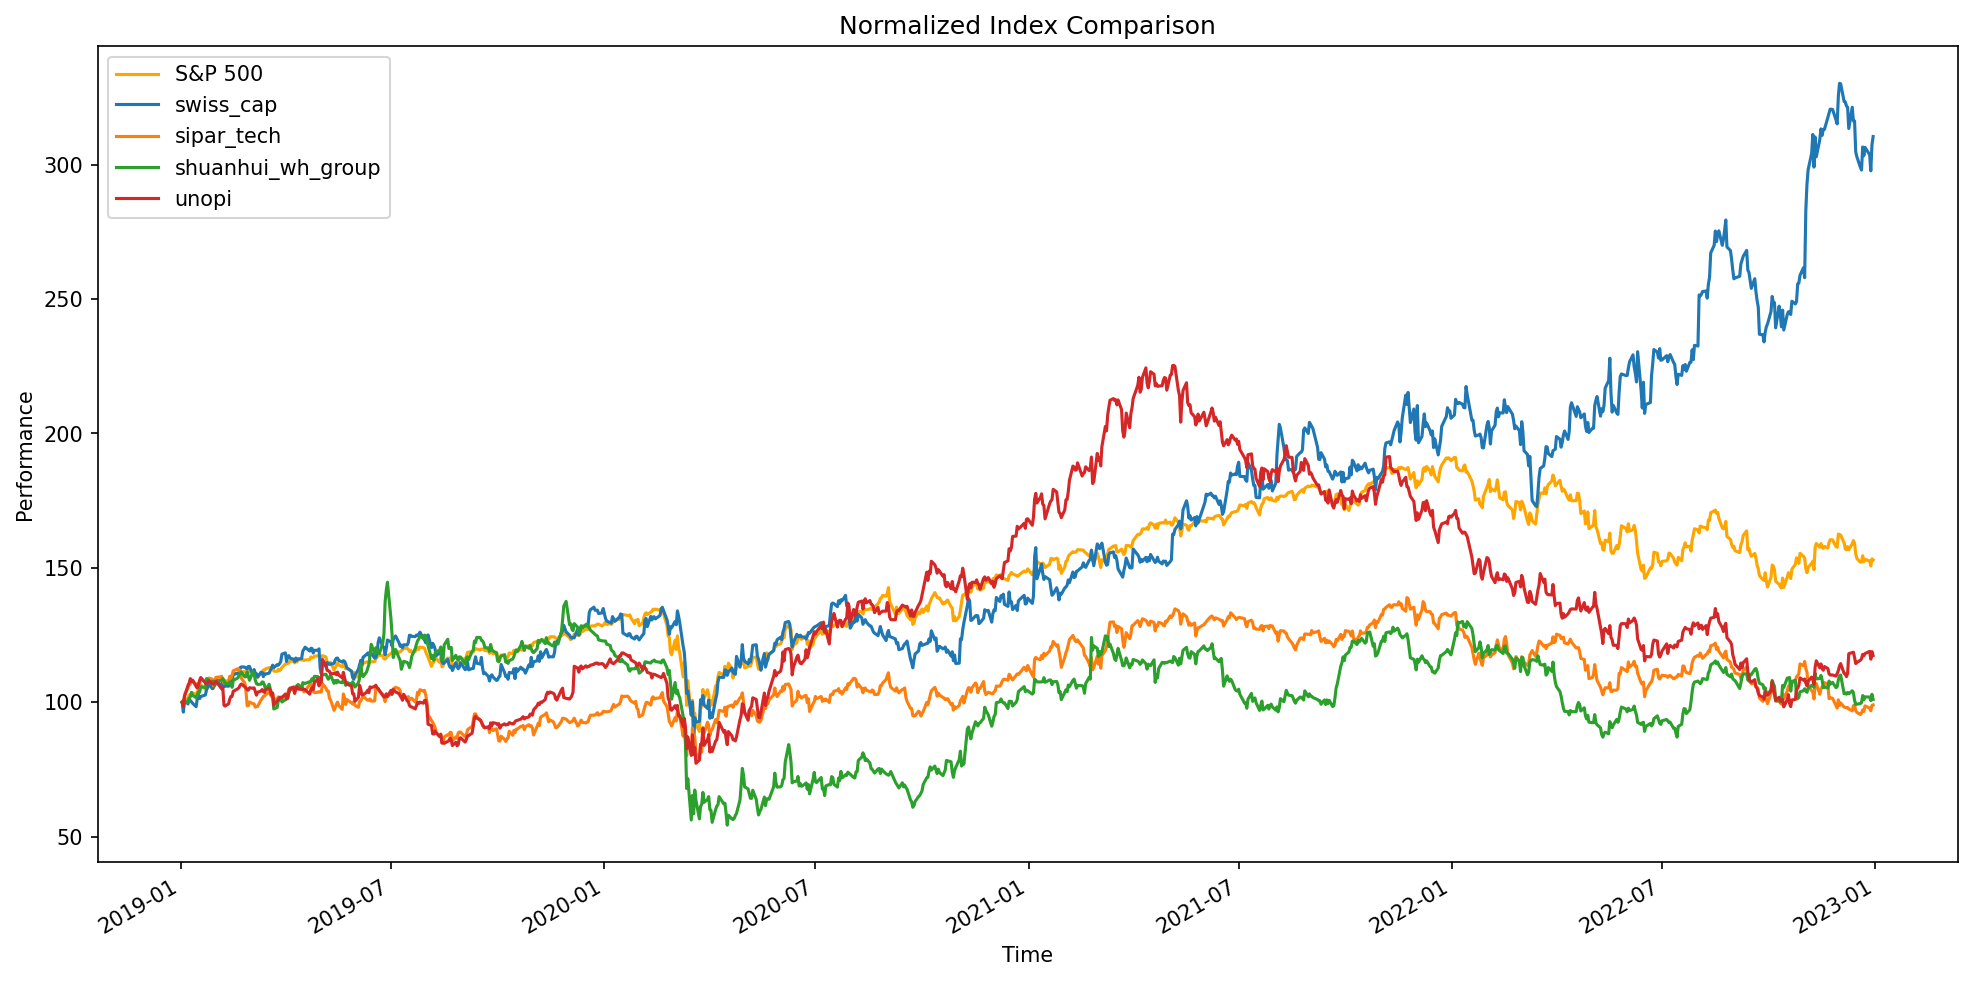

In [46]:
# Normalize the aggregate market cap here
GSPC = adj_close_GSPC.div(adj_close_GSPC.iloc[0]).mul(100)
print(GSPC)
# Plot the index here
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
GSPC.plot(label='S&P 500', color='orange')
for index, index_name in zip(index_list, index_name_list):
    index.plot(label=index_name)

    # adding title to the plot
    plt.title('Normalized Index Comparison')

    # adding Label to the x-axis
    plt.xlabel('Time')
    plt.ylabel('Performance')

    # adding legend to the curve
    plt.legend()
    plt.savefig('NormalizedIndexComparison.pdf')